In [4]:
import pandas as pd
import numpy as np
import string
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load datasets
fake_news = pd.read_csv(r"D:\Fake.csv")
true_news = pd.read_csv(r"D:\True.csv")
news_categories = pd.read_csv(r"D:\news-article-categories.csv")
hate_speech = pd.read_csv(r"D:\HateSpeechDetection.csv")

# Check basic information
print("Fake News Info:", fake_news.info())
print("True News Info:", true_news.info())
print("Hate Speech Info:", hate_speech.info())

# ------------------ DATA CLEANING ------------------ #

# Handle Missing Values
fake_news.fillna("", inplace=True)
true_news.fillna("", inplace=True)
hate_speech.fillna("", inplace=True)

# Remove Duplicates
fake_news.drop_duplicates(inplace=True)
true_news.drop_duplicates(inplace=True)
hate_speech.drop_duplicates(inplace=True)

# ------------------ TEXT PREPROCESSING ------------------ #

# Text Preprocessing Function
stop_words = set(stopwords.words("english"))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    # Lowercase
    text = text.lower()
    # Remove punctuation and special characters
    text = re.sub(f"[{re.escape(string.punctuation)}]", "", text)
    # Remove numbers
    text = re.sub(r"\d+", "", text)
    # Tokenize and remove stopwords
    words = [word for word in text.split() if word not in stop_words]
    # Lemmatize
    words = [lemmatizer.lemmatize(word) for word in words]
    return " ".join(words)

# Apply to Fake News and True News
fake_news["cleaned_text"] = fake_news["text"].apply(preprocess_text)
true_news["cleaned_text"] = true_news["text"].apply(preprocess_text)

# ------------------ FEATURE ENGINEERING ------------------ #

# Combine Fake and True News for unified analysis
fake_news["label"] = 1  # Fake
true_news["label"] = 0  # True
combined_news = pd.concat([fake_news, true_news], axis=0)

# Standardization (if necessary, for numerical features)
scaler = StandardScaler()

# ------------------ HATE SPEECH PREPROCESSING ------------------ #

# Encoding categorical data (if any present)
hate_speech["Platform"] = hate_speech["Platform"].astype("category").cat.codes

# Split Hate Speech Data for Model Training
X_hate = hate_speech[["Platform", "Comment"]]
y_hate = hate_speech["Hateful"]

# Text preprocessing for comments
X_hate["cleaned_comment"] = X_hate["Comment"].apply(preprocess_text)

# ------------------ SAVE CLEANED DATA ------------------ #
fake_news.to_csv(r"D:\Cleaned_Fake.csv", index=False)
true_news.to_csv(r"D:\Cleaned_True.csv", index=False)
combined_news.to_csv(r"D:\Cleaned_Combined_News.csv", index=False)
hate_speech.to_csv(r"D:\Cleaned_HateSpeech.csv", index=False)

print("Data preprocessing complete. Cleaned files saved.")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23481 entries, 0 to 23480
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    23481 non-null  object
 1   text     23481 non-null  object
 2   subject  23481 non-null  object
 3   date     23481 non-null  object
dtypes: object(4)
memory usage: 733.9+ KB
Fake News Info: None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    21417 non-null  object
 1   text     21417 non-null  object
 2   subject  21417 non-null  object
 3   date     21417 non-null  object
dtypes: object(4)
memory usage: 669.4+ KB
True News Info: None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Platform  3000 non-null   o

In [5]:
# Show missing values in the original and cleaned datasets
print("Missing values in original fake news dataset:")
print(fake_news.isnull().sum())

# After preprocessing (assuming fillna was applied)
print("\nMissing values in cleaned fake news dataset:")
print(fake_news.fillna("").isnull().sum())


Missing values in original fake news dataset:
title           0
text            0
subject         0
date            0
cleaned_text    0
label           0
dtype: int64

Missing values in cleaned fake news dataset:
title           0
text            0
subject         0
date            0
cleaned_text    0
label           0
dtype: int64


In [8]:
# Compare the number of rows before and after removing duplicates
original_fake_news_rows = fake_news.shape[0]
cleaned_fake_news_rows = fake_news.drop_duplicates().shape[0]

print(f"Original Fake News Rows: {original_fake_news_rows}")
print(f"Cleaned Fake News Rows (after removing duplicates): {cleaned_fake_news_rows}")


Original Fake News Rows: 23478
Cleaned Fake News Rows (after removing duplicates): 23478


In [10]:
# Show some original and cleaned text samples
sample = fake_news[['text', 'cleaned_text']].head(5)
print(sample)


                                                text  \
0  Donald Trump just couldn t wish all Americans ...   
1  House Intelligence Committee Chairman Devin Nu...   
2  On Friday, it was revealed that former Milwauk...   
3  On Christmas day, Donald Trump announced that ...   
4  Pope Francis used his annual Christmas Day mes...   

                                        cleaned_text  
0  donald trump wish american happy new year leav...  
1  house intelligence committee chairman devin nu...  
2  friday revealed former milwaukee sheriff david...  
3  christmas day donald trump announced would bac...  
4  pope francis used annual christmas day message...  


In [12]:
# Show first few rows with new `label` column
print(fake_news[['title', 'text', 'label']].head(5))


                                               title  \
0   Donald Trump Sends Out Embarrassing New Year’...   
1   Drunk Bragging Trump Staffer Started Russian ...   
2   Sheriff David Clarke Becomes An Internet Joke...   
3   Trump Is So Obsessed He Even Has Obama’s Name...   
4   Pope Francis Just Called Out Donald Trump Dur...   

                                                text  label  
0  Donald Trump just couldn t wish all Americans ...      1  
1  House Intelligence Committee Chairman Devin Nu...      1  
2  On Friday, it was revealed that former Milwauk...      1  
3  On Christmas day, Donald Trump announced that ...      1  
4  Pope Francis used his annual Christmas Day mes...      1  


In [22]:
# Rows before and after removing duplicates
original_fake_news_rows = fake_news.shape[0]
cleaned_fake_news_rows = fake_news.drop_duplicates().shape[0]

print(f"Original Fake News Rows: {original_fake_news_rows}")
print(f"Cleaned Fake News Rows (after removing duplicates): {cleaned_fake_news_rows}")


Original Fake News Rows: 23478
Cleaned Fake News Rows (after removing duplicates): 23478


In [34]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
import pandas as pd

# Assuming `fake_news` and `true_news` are already cleaned and preprocessed

# Combine fake and true news datasets
fake_news['label'] = 1  # Fake news labeled as 1
true_news['label'] = 0  # True news labeled as 0
combined_news = pd.concat([fake_news[['title', 'text', 'label']], true_news[['title', 'text', 'label']]])

# Bag of Words (BoW) feature extraction
vectorizer_bow = CountVectorizer(stop_words='english', max_features=5000)
X_bow = vectorizer_bow.fit_transform(combined_news['text'])

# TF-IDF feature extraction
vectorizer_tfidf = TfidfVectorizer(stop_words='english', max_features=5000)
X_tfidf = vectorizer_tfidf.fit_transform(combined_news['text'])

# Show the shape of the feature matrices
print("BoW Feature Matrix Shape:", X_bow.shape)
print("TF-IDF Feature Matrix Shape:", X_tfidf.shape)


BoW Feature Matrix Shape: (44689, 5000)
TF-IDF Feature Matrix Shape: (44689, 5000)


In [36]:
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer

# Assuming `hate_speech` dataset is already cleaned

# Label encoding for the 'Platform' column
label_encoder = LabelEncoder()
hate_speech['Platform_encoded'] = label_encoder.fit_transform(hate_speech['Platform'])

# TF-IDF for 'Comment' text column
vectorizer_tfidf_hate = TfidfVectorizer(stop_words='english', max_features=5000)
X_tfidf_hate = vectorizer_tfidf_hate.fit_transform(hate_speech['Comment'])

# Show the shape of the feature matrix for hate speech
print("Hate Speech TF-IDF Feature Matrix Shape:", X_tfidf_hate.shape)


Hate Speech TF-IDF Feature Matrix Shape: (2999, 5000)


In [38]:
import scipy.sparse

# Save the feature matrices to .npz format
scipy.sparse.save_npz('fake_news_bow_features.npz', X_bow)
scipy.sparse.save_npz('fake_news_tfidf_features.npz', X_tfidf)
scipy.sparse.save_npz('hate_speech_tfidf_features.npz', X_tfidf_hate)


In [40]:
# Previewing the BoW feature matrix (first 5 rows)
bow_feature_names = vectorizer_bow.get_feature_names_out()
bow_matrix_df = pd.DataFrame(X_bow.toarray(), columns=bow_feature_names)

# Displaying the first 5 rows of the BoW feature matrix
print("BoW Feature Matrix (first 5 rows):")
print(bow_matrix_df.head())


BoW Feature Matrix (first 5 rows):
   00  000  10  100  11  12  120  13  14  15  ...  youtube  ypg  zealand  \
0   0    0   0    0   1   0    0   0   0   0  ...        0    0        0   
1   0    0   0    0   0   0    0   0   0   0  ...        0    0        0   
2   0    0   0    0   0   0    0   0   0   0  ...        0    0        0   
3   0    0   0    0   0   0    0   0   0   0  ...        0    0        0   
4   0    0   0    0   0   0    0   0   0   0  ...        0    0        0   

   zero  zika  zimbabwe  zone  zones  zor  zuma  
0     0     0         0     0      0    0     0  
1     0     0         0     0      0    0     0  
2     0     0         0     0      0    0     0  
3     0     0         0     0      0    0     0  
4     0     0         0     0      0    0     0  

[5 rows x 5000 columns]


In [46]:
# Preview the Platform encoding (first 5 rows)
print("Encoded Platform Values (first 5 rows):")
print(hate_speech[['Platform', 'Platform_encoded']].head())


Encoded Platform Values (first 5 rows):
   Platform  Platform_encoded
0         1                 1
1         1                 1
2         1                 1
3         1                 1
4         1                 1


In [48]:
# Previewing the TF-IDF feature matrix (first 5 rows) for comments
hate_feature_names = vectorizer_tfidf_hate.get_feature_names_out()
hate_matrix_df = pd.DataFrame(X_tfidf_hate.toarray(), columns=hate_feature_names)

# Displaying the first 5 rows of the TF-IDF feature matrix
print("Hate Speech TF-IDF Feature Matrix (first 5 rows):")
print(hate_matrix_df.head())


Hate Speech TF-IDF Feature Matrix (first 5 rows):
   000   10  100  10days  10k  10pm   11   12   13  13th  ...  yup  yuuji  \
0  0.0  0.0  0.0     0.0  0.0   0.0  0.0  0.0  0.0   0.0  ...  0.0    0.0   
1  0.0  0.0  0.0     0.0  0.0   0.0  0.0  0.0  0.0   0.0  ...  0.0    0.0   
2  0.0  0.0  0.0     0.0  0.0   0.0  0.0  0.0  0.0   0.0  ...  0.0    0.0   
3  0.0  0.0  0.0     0.0  0.0   0.0  0.0  0.0  0.0   0.0  ...  0.0    0.0   
4  0.0  0.0  0.0     0.0  0.0   0.0  0.0  0.0  0.0   0.0  ...  0.0    0.0   

   zack  zappa  zayn  zealand  zero  zoe  zone  äôt  
0   0.0    0.0   0.0      0.0   0.0  0.0   0.0  0.0  
1   0.0    0.0   0.0      0.0   0.0  0.0   0.0  0.0  
2   0.0    0.0   0.0      0.0   0.0  0.0   0.0  0.0  
3   0.0    0.0   0.0      0.0   0.0  0.0   0.0  0.0  
4   0.0    0.0   0.0      0.0   0.0  0.0   0.0  0.0  

[5 rows x 5000 columns]


In [50]:
import numpy as np
import pandas as pd

# For TF-IDF matrix (X_tfidf) and corresponding feature names
tfidf_feature_names = vectorizer_tfidf.get_feature_names_out()

# Summing up the TF-IDF scores across all documents (rows)
tfidf_sum = np.sum(X_tfidf.toarray(), axis=0)

# Creating a DataFrame to view words and their total TF-IDF scores
tfidf_feature_importance = pd.DataFrame({
    'word': tfidf_feature_names,
    'importance': tfidf_sum
})

# Sorting the words by importance (high to low)
tfidf_feature_importance = tfidf_feature_importance.sort_values(by='importance', ascending=False)

# Displaying the top 10 most important words
print("Top 10 Important Words based on TF-IDF Scores:")
print(tfidf_feature_importance.head(10))


Top 10 Important Words based on TF-IDF Scores:
           word   importance
4670      trump  2804.089612
3968       said  2112.887494
3453  president  1184.235330
900     clinton   921.277912
3300     people   914.121889
3103      obama   849.229799
4299      state   830.823324
2217      house   792.547486
3862    reuters   790.144677
1442     donald   735.397965


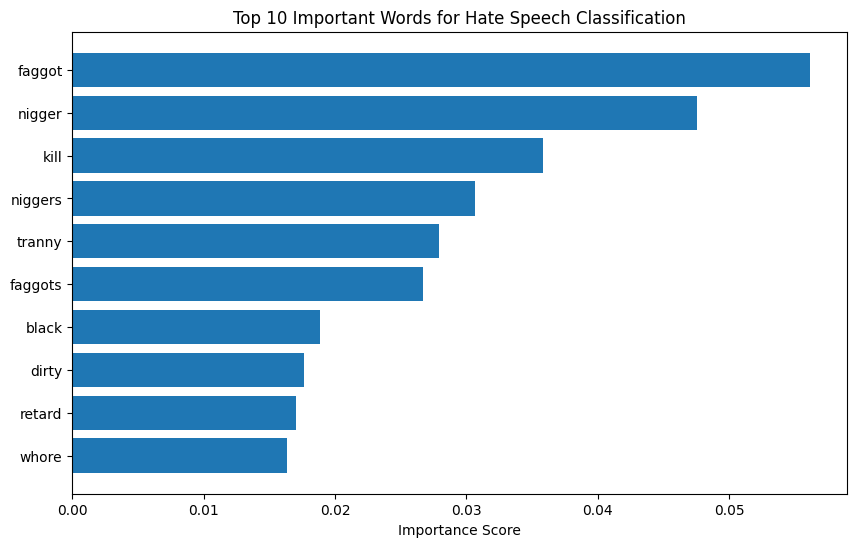

In [54]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

# Train a Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_tfidf_hate, hate_speech['Hateful'])

# Get feature importance scores
importance_scores = rf_classifier.feature_importances_

# Creating a DataFrame for words and their importance scores
feature_importance = pd.DataFrame({
    'word': hate_feature_names,
    'importance': importance_scores
})

# Sorting words by their importance
feature_importance = feature_importance.sort_values(by='importance', ascending=False)

# Plotting the top 10 most important words
plt.figure(figsize=(10, 6))
plt.barh(feature_importance.head(10)['word'], feature_importance.head(10)['importance'])
plt.xlabel('Importance Score')
plt.title('Top 10 Important Words for Hate Speech Classification')
plt.gca().invert_yaxis()  # To show the highest importance at the top
plt.show()


In [56]:
from sklearn.linear_model import LogisticRegression

# Train a Logistic Regression model
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_tfidf, combined_news['label'])

# Get the coefficients of the model
coefficients = log_reg.coef_.flatten()

# Creating a DataFrame for words and their coefficients
coeff_importance = pd.DataFrame({
    'word': tfidf_feature_names,
    'coefficient': coefficients
})

# Sorting words by their coefficient values (high to low)
coeff_importance = coeff_importance.sort_values(by='coefficient', ascending=False)

# Displaying the top 10 words with highest positive coefficients
print("Top 10 Positive Coefficients (Important Words for 'Fake News'):")
print(coeff_importance.head(10))


Top 10 Positive Coefficients (Important Words for 'Fake News'):
          word  coefficient
3659      read     6.597988
2514      just     6.546873
2264     image     5.970632
2009       gop     5.943860
1775  featured     5.854094
2981        mr     5.681125
938        com     5.130028
2167   hillary     4.940038
4874     watch     4.596588
300    america     4.419163


Missing values before cleaning:
category    0
title       0
body        5
dtype: int64
Missing values after cleaning:
category    0
title       0
body        0
text        0
dtype: int64
Top 10 Important Words for Category Classification:
          word  importance
68         art    0.013897
977      women    0.011678
190    company    0.010281
70      artist    0.009414
277  education    0.009257
269     donald    0.009109
668     police    0.008204
778       said    0.008099
618    olympic    0.007090
916      trump    0.006889


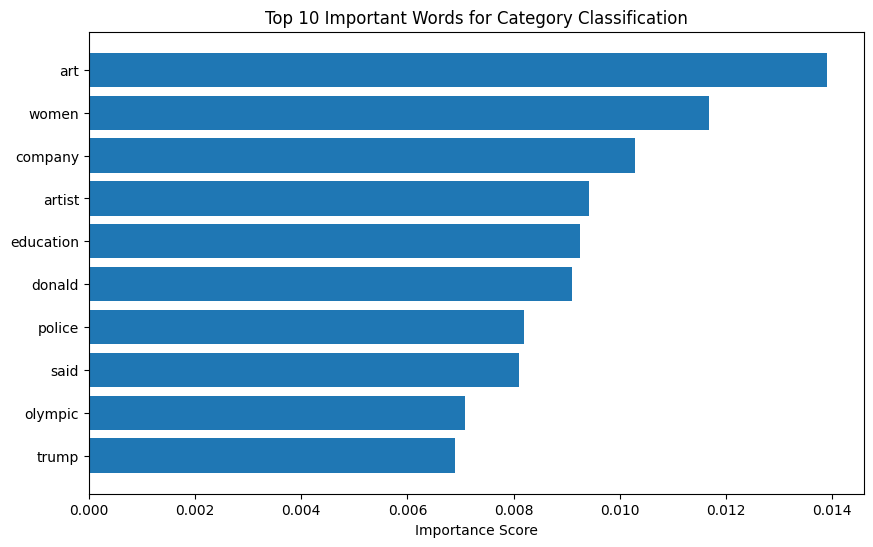

In [72]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

# Load category dataset
category_df = pd.read_csv('D:\\news-article-categories.csv')

# Check for missing values in the 'text' column
print("Missing values before cleaning:")
print(category_df.isnull().sum())

# Combine title and body to create the full text
category_df['text'] = category_df['title'] + " " + category_df['body']

# Option 1: Drop rows with missing text
category_df = category_df.dropna(subset=['text'])

# Option 2: Alternatively, you could fill missing text with an empty string (uncomment to use)
# category_df['text'] = category_df['text'].fillna('')

# Verify the changes
print("Missing values after cleaning:")
print(category_df.isnull().sum())

# Feature Extraction: TF-IDF Vectorizer
vectorizer_tfidf_category = TfidfVectorizer(stop_words='english', max_features=1000)
X_tfidf_category = vectorizer_tfidf_category.fit_transform(category_df['text'])

# Target variable (category)
y_category = category_df['category']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_tfidf_category, y_category, test_size=0.3, random_state=42)

# Train a Random Forest Classifier
rf_classifier_category = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier_category.fit(X_train, y_train)

# Get feature importance scores
feature_importance_category = rf_classifier_category.feature_importances_

# Create a DataFrame to display features and their importance
category_feature_names = vectorizer_tfidf_category.get_feature_names_out()
feature_importance_df = pd.DataFrame({
    'word': category_feature_names,
    'importance': feature_importance_category
})

# Sort features by importance
feature_importance_df = feature_importance_df.sort_values(by='importance', ascending=False)

# Display top 10 important words
print("Top 10 Important Words for Category Classification:")
print(feature_importance_df.head(10))

# Plot top 10 important features
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df.head(10)['word'], feature_importance_df.head(10)['importance'])
plt.xlabel('Importance Score')
plt.title('Top 10 Important Words for Category Classification')
plt.gca().invert_yaxis()  # Show the most important features at the top
plt.show()


In [86]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

# Load the new category dataset
category_df = pd.read_csv('D:\\CATEGORY.csv')

# Preprocessing: Combine headline and article into one column
category_df['text'] = category_df['news_headline'] + " " + category_df['news_article']

# Drop rows with missing text
category_df = category_df.dropna(subset=['text'])

# Feature Extraction: TF-IDF Vectorizer
vectorizer_tfidf_category = TfidfVectorizer(stop_words='english', max_features=1000)
X_tfidf_category = vectorizer_tfidf_category.fit_transform(category_df['text'])

# Target variable (category)
y_category = category_df['news_category']

# Create a dictionary to store top words for each category
category_top_words = {}

# Train a model for each category that has more than one class
for category in category_df['news_category'].unique():
    # Filter data for the current category
    cat_df = category_df[category_df['news_category'] == category]
    
    # Check if there is more than one class (more than one category in the current category subset)
    if len(cat_df['news_category'].unique()) > 1:
        # Vectorize text for the current category
        X_cat = vectorizer_tfidf_category.transform(cat_df['text'])
        
        # Logistic Regression to extract coefficients
        lr_classifier = LogisticRegression(max_iter=1000)
        lr_classifier.fit(X_cat, cat_df['news_category'])
        
        # Get the coefficients (importance of each word)
        coef = lr_classifier.coef_.flatten()  # Flatten coefficients for easier access
        
        # Create a DataFrame of word importance
        coef_df = pd.DataFrame({
            'word': vectorizer_tfidf_category.get_feature_names_out(),
            'importance': coef
        })
        
        # Sort words by importance
        coef_df = coef_df.sort_values(by='importance', ascending=False)
        
        # Store top 10 words for the category
        category_top_words[category] = coef_df.head(10)['word'].values.tolist()

# Check if there are valid categories to plot
if len(category_top_words) > 0:
    # Plotting the top words for each category
    categories = list(category_top_words.keys())
    n_categories = len(categories)
    n_cols = 3  # Set a fixed number of columns
    n_rows = (n_categories // n_cols) + (1 if n_categories % n_cols != 0 else 0)  # Calculate the required number of rows

    # Create a subplot grid
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))
    axes = axes.flatten()  # Flatten the axes array for easier indexing

    for i, category in enumerate(categories):
        axes[i].barh(category_top_words[category], range(1, 11))
        axes[i].set_title(f"Top Words for {category}")
        axes[i].set_xlabel('Importance')
        axes[i].set_ylabel('Words')

    # Hide any extra subplots if the number of categories is less than the grid size
    for j in range(i + 1, len(axes)):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()
else:
    print("No valid categories available for plotting.")


No valid categories available for plotting.


In [88]:
import pandas as pd

# Load the dataset
category_df = pd.read_csv('D:\\CATEGORY.csv')

# Check the distribution of categories
category_counts = category_df['news_category'].value_counts()

# Print category distribution
print("Category Distribution:")
print(category_counts)


Category Distribution:
news_category
world            1021
entertainment     998
sports            856
technology        751
politics          546
science           389
automobile        256
Name: count, dtype: int64


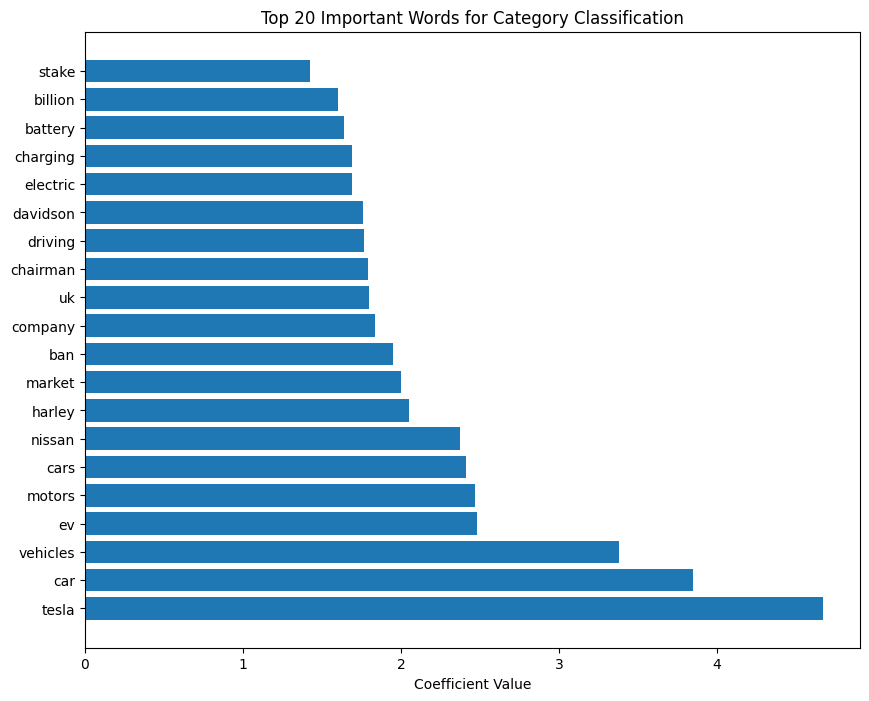

In [90]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset
category_df = pd.read_csv('D:\\CATEGORY.csv')

# Combine 'news_headline' and 'news_article' into a single text field for feature extraction
category_df['text'] = category_df['news_headline'] + " " + category_df['news_article']

# Feature Extraction: TF-IDF Vectorizer
vectorizer_tfidf = TfidfVectorizer(stop_words='english', max_features=1000)
X_cat = vectorizer_tfidf.fit_transform(category_df['text'])

# Target variable (news category)
y_cat = category_df['news_category']

# Logistic Regression to extract coefficients
lr_classifier = LogisticRegression(max_iter=1000)
lr_classifier.fit(X_cat, y_cat)

# Get the coefficients (importance of each word)
coef = lr_classifier.coef_.flatten()  # Flatten coefficients for easier access
feature_names = vectorizer_tfidf.get_feature_names_out()

# Pair words with their coefficients and sort by importance
sorted_features = sorted(zip(feature_names, coef), key=lambda x: abs(x[1]), reverse=True)

# Get top 20 words with the highest coefficients
top_words = sorted_features[:20]

# Plot top words and their corresponding coefficients
words, importance = zip(*top_words)

plt.figure(figsize=(10, 8))
plt.barh(words, importance)
plt.xlabel('Coefficient Value')
plt.title('Top 20 Important Words for Category Classification')
plt.show()


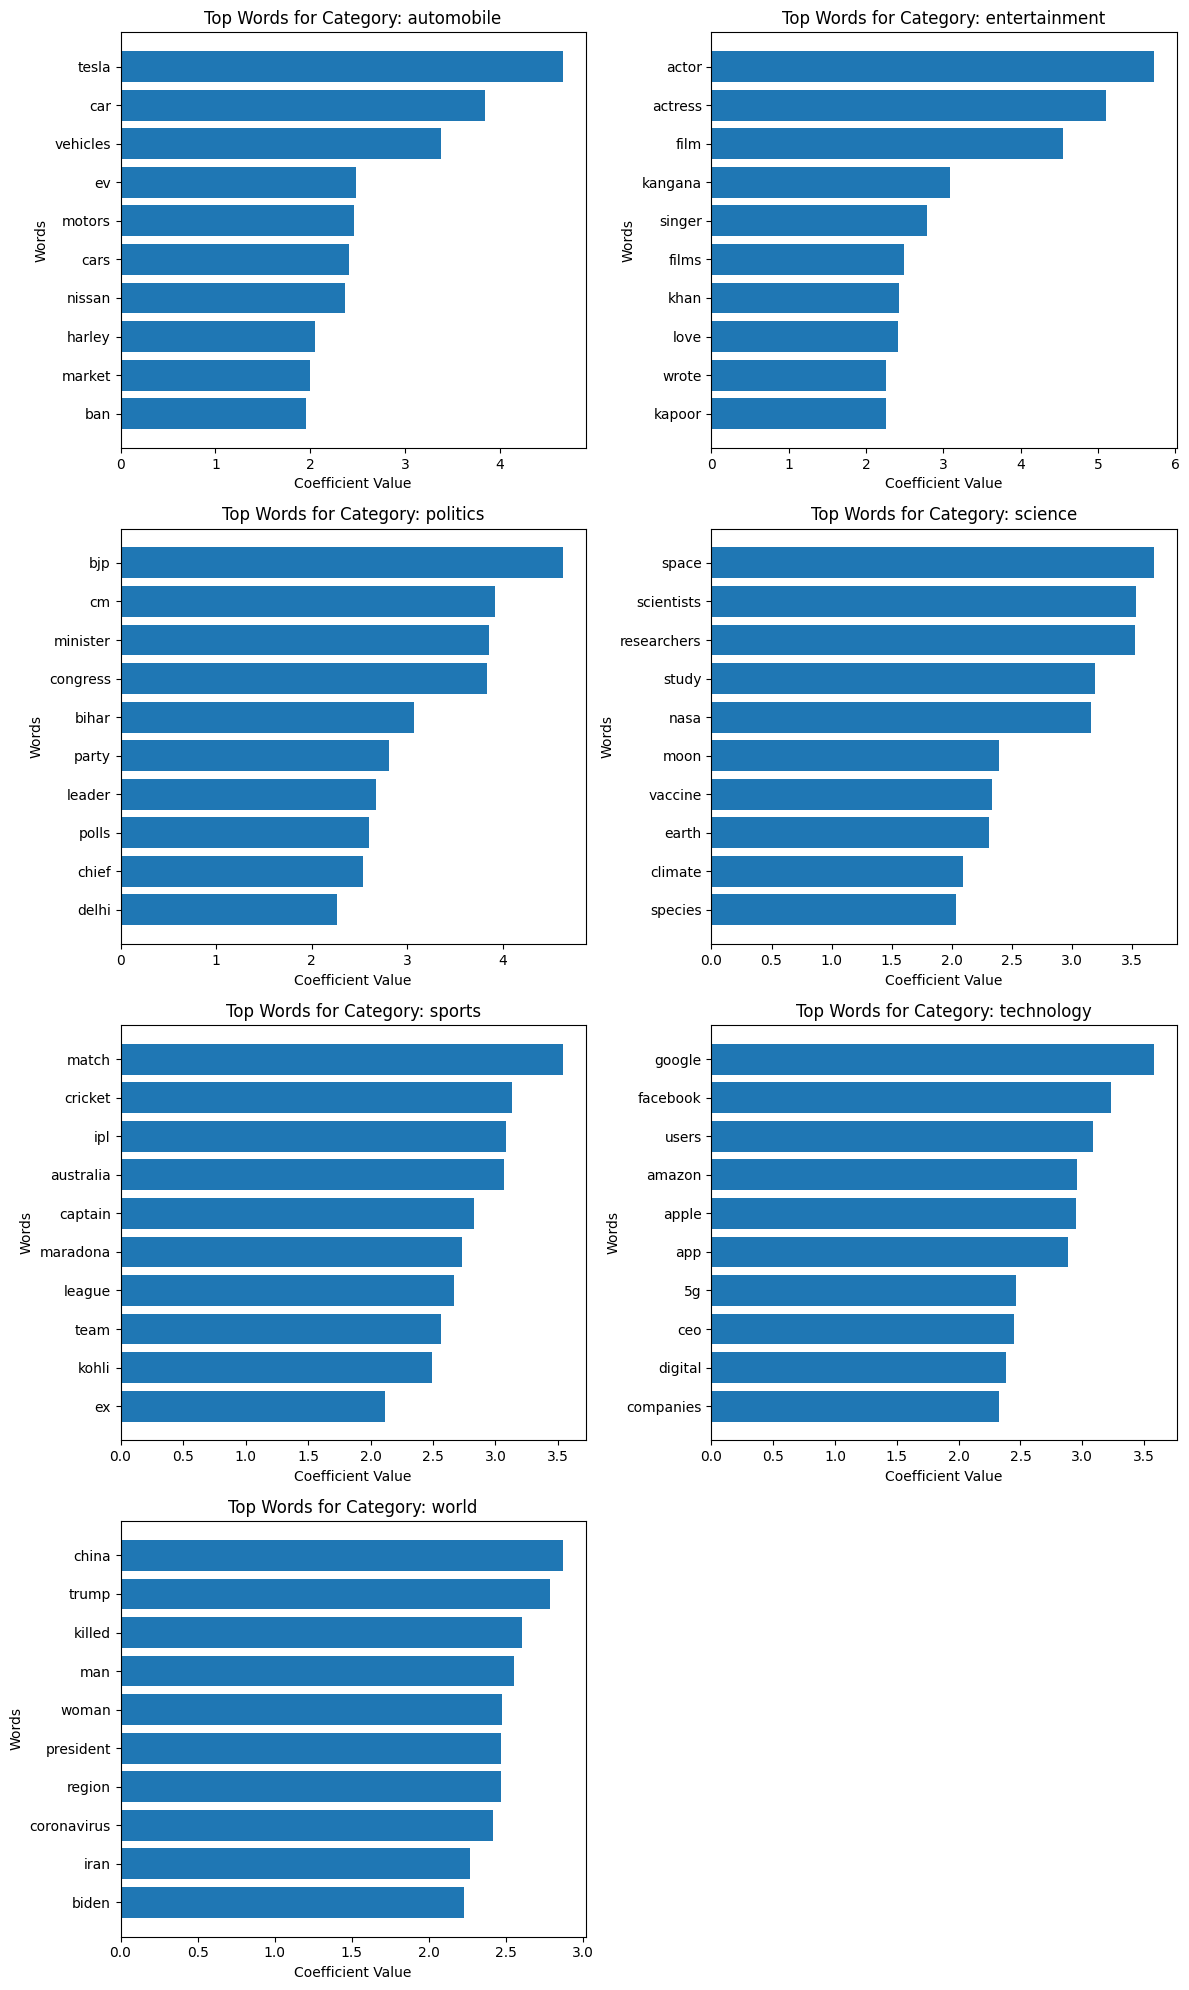

In [94]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset
category_df = pd.read_csv('D:\\CATEGORY.csv')

# Combine 'news_headline' and 'news_article' into a single text field for feature extraction
category_df['text'] = category_df['news_headline'] + " " + category_df['news_article']

# Feature Extraction: TF-IDF Vectorizer
vectorizer_tfidf = TfidfVectorizer(stop_words='english', max_features=1000)
X_cat = vectorizer_tfidf.fit_transform(category_df['text'])

# Target variable (news category)
y_cat = category_df['news_category']

# Logistic Regression to train the model for multi-class classification
lr_classifier = LogisticRegression(max_iter=1000)
lr_classifier.fit(X_cat, y_cat)

# Get the feature names (words) from the vectorizer
feature_names = vectorizer_tfidf.get_feature_names_out()

# Get coefficients for each category
coef = lr_classifier.coef_

# Set up the number of categories (based on the classifier)
categories = lr_classifier.classes_

# Number of top words to display for each category
top_n = 10

# Calculate number of rows and columns needed for subplots
n_categories = len(categories)
n_cols = 2  # Number of columns for the plot grid
n_rows = (n_categories // n_cols) + (1 if n_categories % n_cols != 0 else 0)  # Calculate rows dynamically

# Create a subplot grid based on the actual number of categories
fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 5 * n_rows))

# Flatten the axes array for easier indexing if we have multiple rows
axes = axes.flatten()

# For each category, find the top words and plot them
for i, category in enumerate(categories):
    ax = axes[i]  # Get the correct subplot axis

    # Get the indices of the top words for the current category
    top_indices = np.argsort(coef[i])[-top_n:]  # Top words by coefficient
    top_words = [feature_names[idx] for idx in top_indices]
    top_coef = coef[i][top_indices]

    # Plotting
    ax.barh(top_words, top_coef)
    ax.set_title(f"Top Words for Category: {category}")
    ax.set_xlabel('Coefficient Value')
    ax.set_ylabel('Words')

# Hide any extra empty subplots if there are fewer categories than subplots
for i in range(n_categories, len(axes)):
    axes[i].axis('off')

plt.tight_layout()
plt.show()


In [31]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.utils import to_categorical

# Load the cleaned datasets
fake_df = pd.read_csv('D:/Cleaned_Fake.csv')
true_df = pd.read_csv('D:/Cleaned_True.csv')
combined_news_df = pd.read_csv('D:/Cleaned_Combined_News.csv')
hate_speech_df = pd.read_csv('D:/Cleaned_HateSpeech.csv')
category_df = pd.read_csv('D:/Processed_Category.csv')

# Preprocess the data
fake_df['label'] = 0  # Fake news = 0
true_df['label'] = 1  # True news = 1

# Prepare Combined News and Hate Speech datasets
combined_news_df['label'] = 2  # Combined news = 2
hate_speech_df['label'] = 3  # Hate speech = 3

# Concatenate all datasets
df = pd.concat([
    fake_df[['text', 'label']], 
    true_df[['text', 'label']], 
    combined_news_df[['text', 'label']].rename(columns={'text': 'text'}), 
    hate_speech_df[['Comment', 'label']].rename(columns={'Comment': 'text'})
], axis=0)

# Prepare Text Data
texts = df['text'].values
labels = df['label'].values

# Tokenization and padding
tokenizer = Tokenizer(num_words=5000, lower=True)
tokenizer.fit_on_texts(texts)
X = tokenizer.texts_to_sequences(texts)
X = pad_sequences(X, maxlen=150)

# One-hot encode the labels
y = to_categorical(labels)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the LSTM model
model = Sequential()
model.add(Embedding(input_dim=5000, output_dim=128, input_length=150))
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(4, activation='softmax'))  # 4 categories: fake, true, combined, hate speech

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=5, batch_size=64, validation_data=(X_test, y_test))

# Evaluate the model
score = model.evaluate(X_test, y_test, batch_size=64)
print(f"Test Accuracy: {score[1]}")

# Predict and check the results
predictions = model.predict(X_test)
predicted_labels = np.argmax(predictions, axis=1)

# You can print out the predicted labels and compare with actual labels
print("Predicted labels:", predicted_labels[:10])
print("Actual labels:", np.argmax(y_test, axis=1)[:10])


Epoch 1/5


C:\Users\HP\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


1155/1155 ━━━━━━━━━━━━━━━━━━━━ 264s 226ms/step - accuracy: 0.4974 - loss: 0.8470 - val_accuracy: 0.5053 - val_loss: 0.7205
Epoch 2/5
1155/1155 ━━━━━━━━━━━━━━━━━━━━ 246s 213ms/step - accuracy: 0.5088 - loss: 0.7160 - val_accuracy: 0.5019 - val_loss: 0.7260
Epoch 3/5
1155/1155 ━━━━━━━━━━━━━━━━━━━━ 255s 221ms/step - accuracy: 0.5103 - loss: 0.7036 - val_accuracy: 0.5017 - val_loss: 0.7031
Epoch 4/5
1155/1155 ━━━━━━━━━━━━━━━━━━━━ 255s 220ms/step - accuracy: 0.5185 - loss: 0.6905 - val_accuracy: 0.4927 - val_loss: 0.7022
Epoch 5/5
1155/1155 ━━━━━━━━━━━━━━━━━━━━ 256s 221ms/step - accuracy: 0.5142 - loss: 0.6848 - val_accuracy: 0.4673 - val_loss: 0.6981
289/289 ━━━━━━━━━━━━━━━━━━━━ 18s 61ms/step - accuracy: 0.4706 - loss: 0.6964
Test Accuracy: 0.4673089385032654
578/578 ━━━━━━━━━━━━━━━━━━━━ 17s 29ms/step
Predicted labels: [1 0 0 1 0 0 2 1 1 1]
Actual labels: [2 0 0 2 0 0 0 1 1 2]


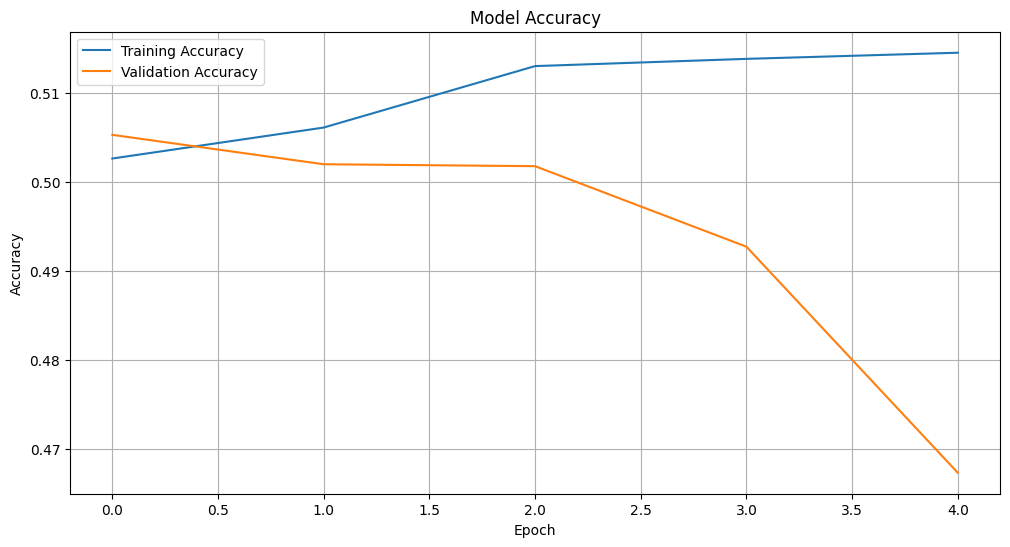

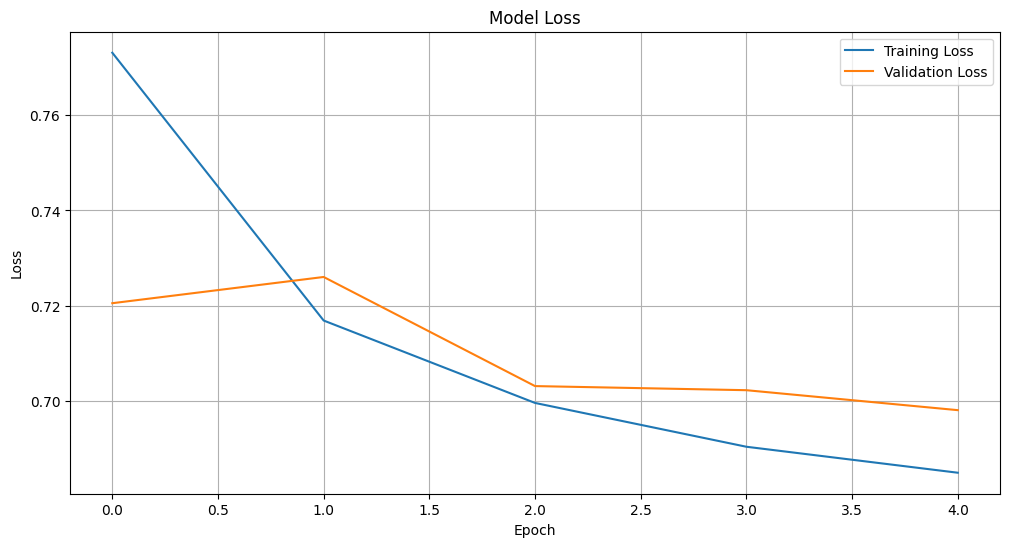

In [33]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

# Plot training & validation loss values
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()


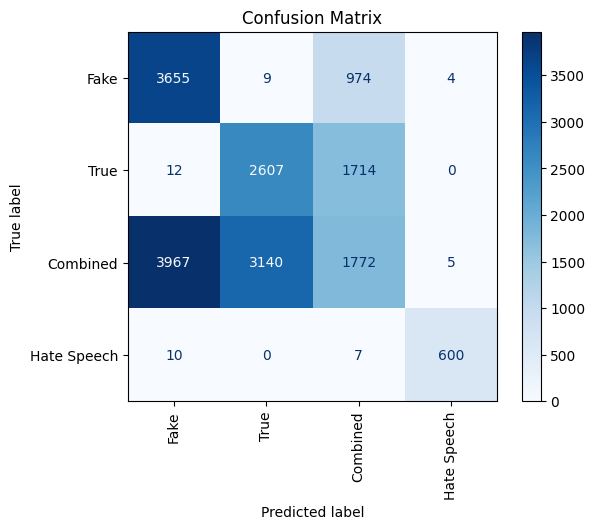

In [35]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Generate confusion matrix
cm = confusion_matrix(np.argmax(y_test, axis=1), predicted_labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Fake', 'True', 'Combined', 'Hate Speech'])
disp.plot(cmap=plt.cm.Blues, xticks_rotation='vertical')
plt.title("Confusion Matrix")
plt.show()


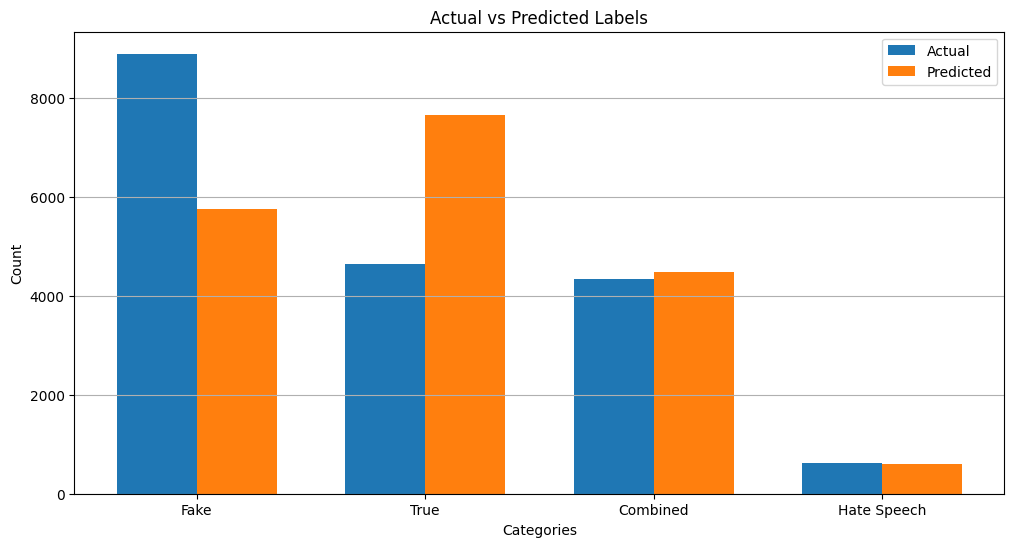

In [39]:
# Count actual and predicted labels
actual_counts = pd.Series(np.argmax(y_test, axis=1)).value_counts(sort=False)
predicted_counts = pd.Series(predicted_labels).value_counts(sort=False)

categories = ['Fake', 'True', 'Combined', 'Hate Speech']

# Plot side-by-side bar chart
x = np.arange(len(categories))
width = 0.35

plt.figure(figsize=(12, 6))
plt.bar(x - width/2, actual_counts, width, label='Actual')
plt.bar(x + width/2, predicted_counts, width, label='Predicted')
plt.xticks(x, categories)
plt.xlabel('Categories')
plt.ylabel('Count')
plt.title('Actual vs Predicted Labels')
plt.legend()
plt.grid(axis='y')
plt.show()


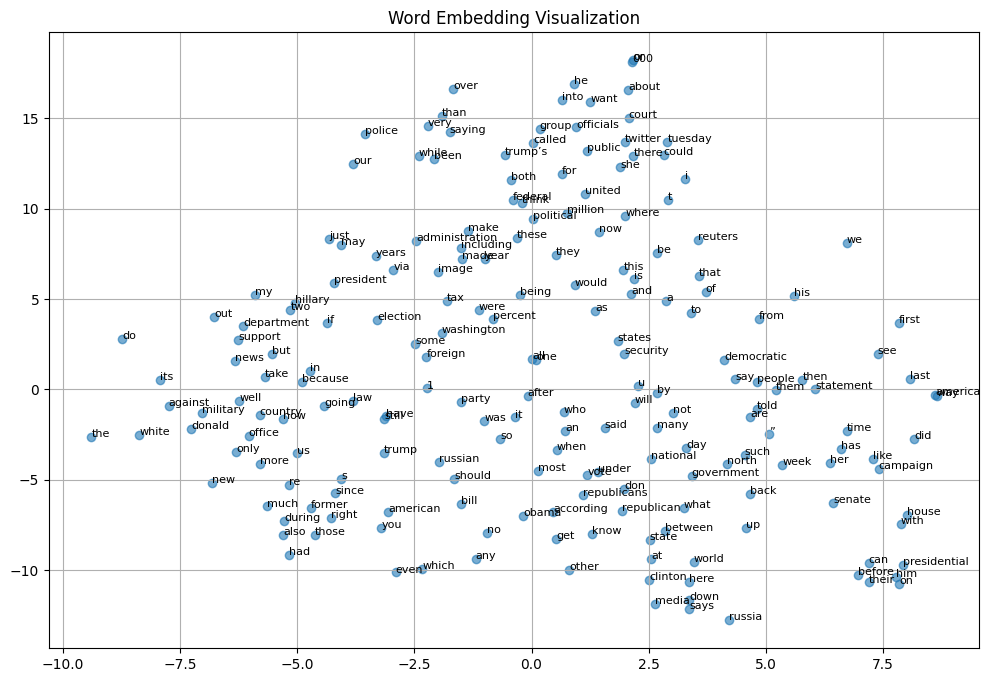

In [41]:
from sklearn.manifold import TSNE

# Extract the embedding weights
embedding_layer = model.layers[0]
weights = embedding_layer.get_weights()[0]

# Reduce dimensions for visualization
tsne = TSNE(n_components=2, random_state=42)
reduced_embeddings = tsne.fit_transform(weights[:200])  # Limiting to the first 200 words

# Plot the reduced embeddings
plt.figure(figsize=(12, 8))
plt.scatter(reduced_embeddings[:, 0], reduced_embeddings[:, 1], alpha=0.6)
for i, word in enumerate(tokenizer.index_word.items()):
    if i >= 200:
        break
    plt.text(reduced_embeddings[i, 0], reduced_embeddings[i, 1], word[1], fontsize=8)
plt.title("Word Embedding Visualization")
plt.grid()
plt.show()
